In [26]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

### Задание 1
Подведите результаты эксперимента в экселе по следующим данным: ab_stats.csv - Google Диск:
Стат значимо ли отличается ARPPU в двух группах ? Какие рекомендации дадите 
менеджеру?

In [3]:
data = pd.read_csv('ab_stats.csv')
data

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814
...,...,...,...,...,...
23647,0.0,0,0,B,10.207152
23648,0.0,0,0,B,5.148761
23649,0.0,0,0,B,4.809019
23650,0.0,0,0,B,8.127488


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


In [5]:
data = data.astype({'num_purchases': np.uint8}) #было от -2 в степени 8 до 2 в 8 степени, uint - это только 0 до 2 в степени 8 (убрали отриц значения и сократили память)

In [6]:
data.describe()

,revenue,num_purchases,purchase,av_site visit
count,23652.000000,23652.000000,23652.000000,23652.000000
mean,0.324689,0.043590,0.020717,7.013112
std,9.557730,1.079403,0.142438,3.154584
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.173787
50%,0.000000,0.000000,0.000000,7.007936
75%,0.000000,0.000000,0.000000,8.864119
max,1303.609284,152.000000,1.000000,22.446822


In [28]:
# Рассчитаем пользователей, которые совершили покупку
A_pay = data[(data['ab_group'] == 'A') & (data['num_purchases'] > 0)] 
B_pay = data[(data['ab_group'] == 'B') & (data['num_purchases'] > 0)]
A_pay.shape, B_pay.shape

((256, 5), (224, 5))

In [22]:
# Рассчитаем доход от платящих пользователей
revenue_A = A_pay['revenue'].sum()
revenue_B = B_pay['revenue'].sum() # доход от платящих пользователей
revenue_A, revenue_B

(4786.807972, 2783.0315549999987)

In [23]:
# Рассчитаем количество платящих пользователей
num_A_pay = len(A_pay)
num_B_pay = len(B_pay) #кол-во платящих пользователей
num_A_pay, num_B_pay

(256, 224)

In [24]:
# Рассчитаем ARPPU для групп
ARPPU_A = revenue_A/num_A_pay
ARPPU_B = revenue_B/num_B_pay
ARPPU_A, ARPPU_B

(18.698468640625, 12.424248013392852)

In [27]:
p_value = ttest_ind(A_pay['revenue'], B_pay['revenue']) # t-тест двух независимых выборок
p_value

Ttest_indResult(statistic=1.0509297671514621, pvalue=0.29382185663081534)

### Вывод:
Так как p_value больше, чем alpha = 0,05, то мы принимаем нулевую гипотезу о том, что статистических различий между группами по ARPPU нет. 
Менеджеру можно порекомендовать следующее: увеличить размер выборки, чтобы обнаружить разницу, по результатам этого теста не делать однозначного выводу в пользу какой-либо из версий.

### Задание 2
Мы хотим провести А/Б-тест для трех источников трафика. Нынешняя конверсия равна 5%,
мы ожидаем прирост в 0,2%.
Уровень доверия 97% и уровень мощности 87%.
Всего на наш продукт заходит 40 000 пользователей в месяц.


**3.**
За сколько дней мы сможем протестировать гипотезу? И что вы можете посоветовать по
результатам подсчета?

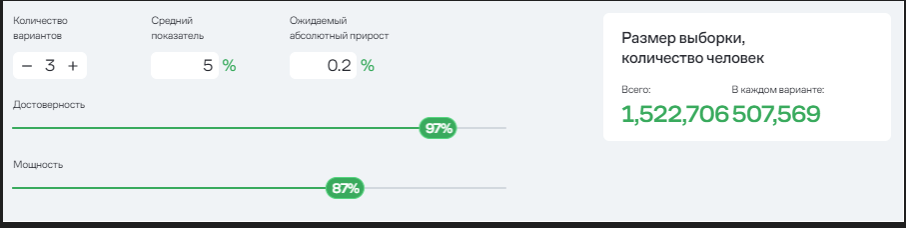


In [30]:
n = 1522706
users_month = 40000
days = (n/users_month)*30
f'Количество дней, необходимое для проведения теста = {round(days, 2)}'

'Количество дней, необходимое для проведения теста = 1142.03'

Для уменьшения времени теста можно уменьшить количество источников трафика, так как для двух источников время проведения теста уменьшится почти вдвое или изменить показатели достоверности и мощности

**3.2**
Допустим в задаче нет проблемы с количеством посетителей на сайт, тогда подведите результаты тестирования, если у нас следующие результаты по количеству конверсии:

1. 25 000
2. 30 000
3. 32 000

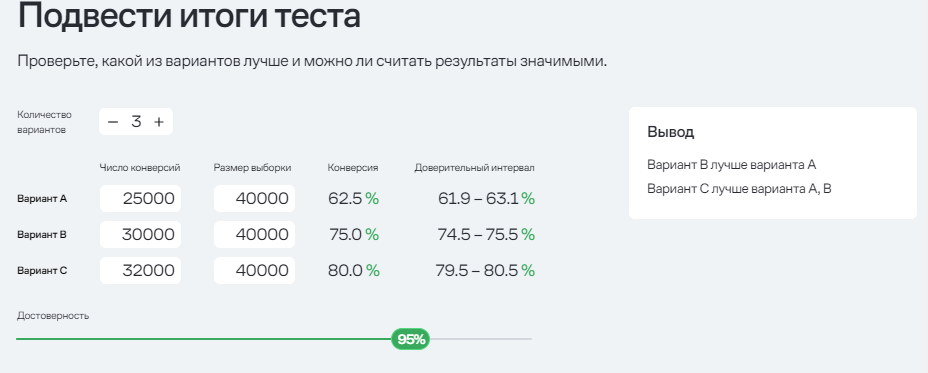

В соответствии с результатами теста 2 вариант лушче первого. 3 вариант лучше первого и второго. Следовательно 3-й вариант лучше всех.

### Задание 3
Вы решили сравнивать метрику CPA в двух группах. Размер выборки - 2350 элементов в каждой группе. 

Для проверки нормальности распределения на выборке в 2350 наблюдений применили , критерий Шапиро-Уилка и получили p-value, равный 0.00002, alpha = 5%. 

Какой бы вывод мы могли сделать в данном случае? 

В этом случае какой статистический критерий для проверки первоначальной гипотезы тут лучше всего подойдёт и почему ?

**Вывод:**
Так как мы получили p-value<alpha, то мы отвергаем нулевую гипотезу о нормальности распределений и вывод о ненормальности распределений. Таким образом в данном случае нам необходимо рассматривать непараметрические критерии, а именно критерий Манна-Уитни, так как он подходит для проверки двух независимых выборок, имеющих распределение отличное от нормального. И размер наших выборок небольшой. 

### Задание 4
Мы провели АБ-тест на увеличение average timespent per user. По итогам тестирования мы получили следующие данные. 

Является ли результат статистически значимым с уровнем доверия 80%? 

Какую версию мы выкатим на продакшн? 

A) Средняя - 360, отклонение - 40, количество - 9802 

B) Средняя - 352, отклонение - 58, количество - 9789

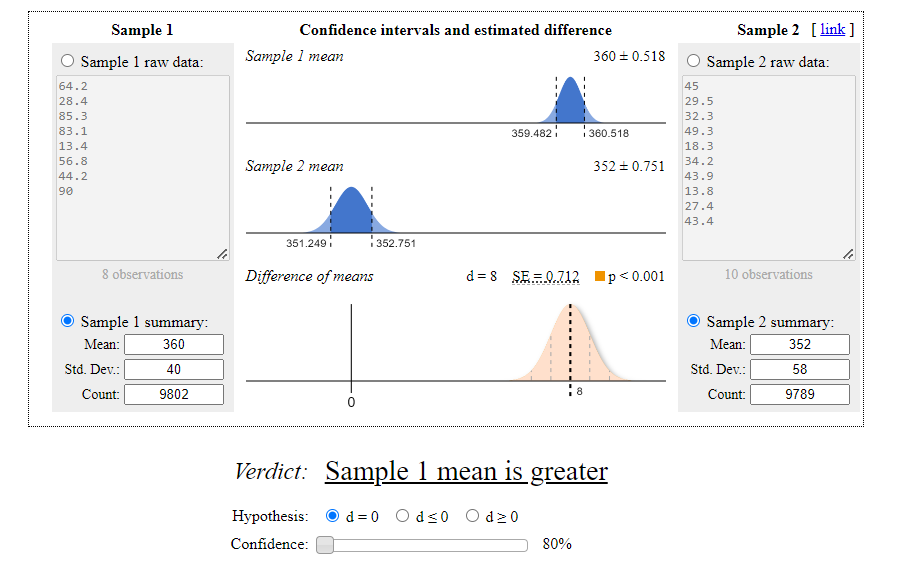

По результатам проверки АБ-теста, две группы статистически значимо различаются. Первая версия продукта значительно повышает среднее время пользователя, поэтому выкатываем ее.

### Задание 5.
Создайте техническую архитектуру проекта по аб тестированию продукта он-лайн кинотеатра с учетом кросс-девайс аналитики по следующей гипотезе: Если договориться с банком о 99% кэшбэке на подписку первого месяца, то это повысит конверсию в подписку на 30%, благодаря упрощенному принятию решения со стороны пользователя. На схеме необходимо отобразить:

Управленческий процесс по договоренностям с внешними партнерами
Архитектуру данных с указанием систем, из которых будем скачивать данные
Внутрикомандное взаимодействие

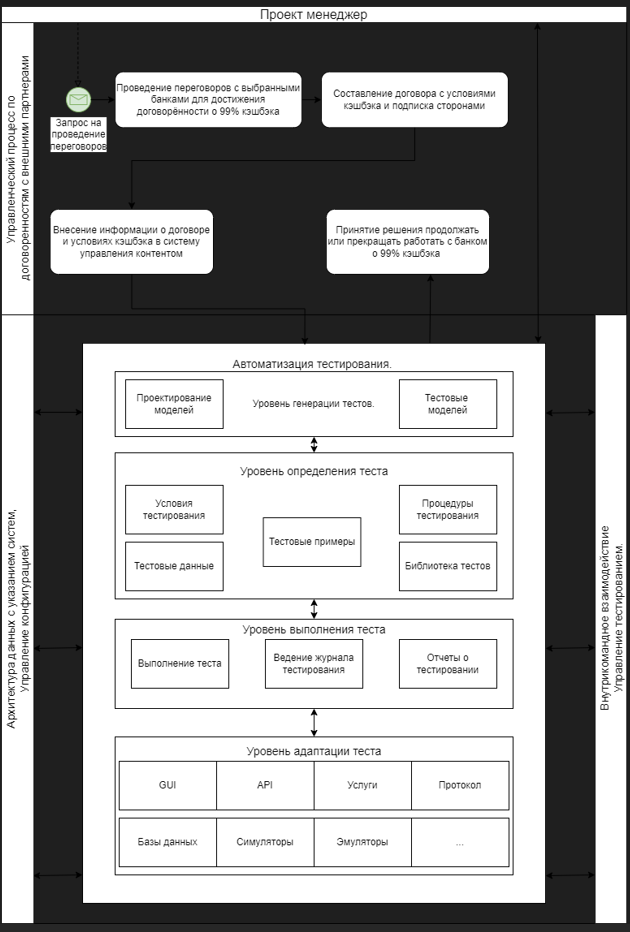